# Neural Networks Learning

**Import third-party libraries and modules**

In [1]:
import numpy as np
import scipy.io as io
import scipy.optimize as opt
import matplotlib.pyplot as plt

from displayData import displayData
from nnCostFunction import nnCostFunction
from predict import predict
from randInitializeWeights import randInitializeWeights
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient

## 1. Neural Networks
We will implement the backpropagation algorithm to learn the parameters for the neural network.

Load dataset

In [2]:
# Load Training Data
print('Loading and Visualizing Data ...\n')

data = io.loadmat('ex4data1.mat')
X = data['X']
y = data['y']

m = len(y)

Loading and Visualizing Data ...



Initialize some basic variables

In [3]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

### 1.1 Visualizing the data
This is the same datset that we used in the **ex3** exericse. There are 5000 training examples in **ex3data1.mat**. Each of these training is a single row in our data matrix **X**. This give us 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

$$X = 
\begin{bmatrix}
\big( x^{(1)} \big)^{T} \\
\big( x^{(2)} \big)^{T} \\
\vdots \\
\big( x^{(m)} \big)^{T}
\end{bmatrix}
$$

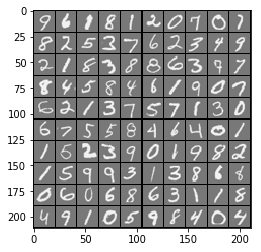

In [4]:
# Randomly select 100 data points to display
sel = np.random.permutation(m)
displayData(X[sel[:100], :])

### 1.2 Model representation
Our network is shown in figure below:

![](fig/NN_2layer.png)

We have been provided with a set of network parameters $\big( \Theta^{(1)}, \Theta^{(2)} \big)$ already trained by us. These are stored in **ex4weights.mat** file and will be loaded by **loadmat** function of Scipy library. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [5]:
## ====================== Part 2: Loading Parameters ======================
# In this part of the exercises, we load some pre-initialized
# neural network parameters.

print('\nLoading saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2
weights = io.loadmat('ex4weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']


Loading saved Neural Network Parameters ...



In [6]:
# Unroll parameters
Theta1 = Theta1.reshape(np.size(Theta1), 1)
Theta2 = Theta2.reshape(np.size(Theta2), 1)

nn_params = np.vstack((Theta1, Theta2)).flatten()

### 1.3 Feedforward and cost function
Now we will implement the cost function and gradient for the neural network.

Recall that the cost function for the neural network (withou regularization) is

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y^{(i)}_{k}\log(h_{\theta}(x^{(i)})_{k}) - (1-y^{(i)}_{k})\log(1-h_{\theta}(x^{(i)})_{k})]$$

where, $h_{\theta}$ is computed as:

![](fig/h_theta.png)

And $K = 10$ is the total number of possible labels. Note that $h_{\theta}\big(x^{(i)}\big)_{k} = a_{k}^{(3)}$ is the activation (output value) of the $k$-th output unit. Also, recall that whereas the original labels (in the variable y) were $1, 2, ..., 10$, for the purpose of training a neural network, we need to recode the labels as vectors containing only values 0 or 1, so that

$$
y = 
\begin{bmatrix}
1 \\
0 \\
0 \\
\vdots \\
0
\end{bmatrix}
,
\begin{bmatrix}
0 \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix}
,\ldots or 
\begin{bmatrix}
0 \\
0 \\
0 \\
\vdots \\
1
\end{bmatrix}
$$

For example, if $x^{(i)}$ is an image of the digit 5, then the corresponding $^{(i)}$ (that we should use with the cost function) should be a 10-dimensional vector with $y_{5} = 1$, and the other elements equal to $0$

We should implement the feedforward computation that computes $h_{\theta}\big(x^{(i)}\big)$ for every example $i$ and sum the cost over all examples.

Once we are done, our notebook will cal **nnCostFunction** function using the set of parameters for *Theta1* and *Theta2*. We should see that the cost is about $0.287629$

In [7]:
## ============================== Part 3: Compute Cost (Feedforward) ========================
# To the neural network, you should first start by implementing the feedforward part of the neural network
# that returns the cost only. After implementing the feedforward to compute the cost, you can verify that
# your implementation is correct by verifying that you get the same cost as us for the fixed
# debugging parameters
print('Feedforward using neural network ...\n')

# Weight regularizatoin parameter (we set this to 0 here)
lambda_ = 0

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[0]

print('Cost at the parameters (loaded form ex4weights): %f' % (J))
print('This value should be about 0.287629\n')

Feedforward using neural network ...

Cost at the parameters (loaded form ex4weights): 0.287629
This value should be about 0.287629



### 1.4 Regularized cost function
The cost function for neural networks with regularization is given by

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}[-y^{(i)}_{k}\log(h_{\theta}(x^{(i)})_{k}) - (1-y^{(i)}_{k})\log(1-h_{\theta}(x^{(i)})_{k})] + 
\frac{\lambda}{2m}
\big[
\sum_{j=1}^{25}\sum_{k=1}^{400}\big(\Theta_{j,k}^{(1)}\big)^{2} + 
\sum_{j=1}^{10}\sum_{k=1}^{25}\big(\Theta_{j,k}^{(2)}\big)^{2}
\big]
$$

We can assume that the neural network will only have 3 layers - an input layer, a hidden layer and an output layer. However, our code should work for any number of inputs units, hidden units and output units. While we have explicitly listed the indices above for $\Theta^{(1)}$ and $\Theta^{(2)}$ for clarity, do note that **our code should in general work with $\Theta^{(1)}$ and $\Theta^{(2)}$ of any size.**

Note that we should not be regularizing the terms that corresponding to the bias. For the matrices *Theta1* and *Theta2*, this corresponds to the first column of each matrix. We should now add regularization to our cost function. Notice that our existing **nnCostFunction** and then later add the cost for the regularization terms.

Once we are done, the notebook will call our **nnCostFunction** using the loaded set of parameters for *Theta1* and *Theta2*, and *$\lambda = 1$.*
We should see that the cost is about $0.383770.$

In [8]:
## ======================== Part 4: Implement Regularization =============================
# Once your cost function implementation is correct, you should now
# continue to implement the regularization with the cost.
print('\nChecking cost function (w/ Regularization) ...\n')

# Weight regularization parameter (we set this to 1 here)
lambda_ = 1

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[0]
# J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): %f' % (J))
print('this value should be about 0.383770)\n')


Checking cost function (w/ Regularization) ...

Cost at parameters (loaded from ex4weights): 0.383770
this value should be about 0.383770)



## 2. Backpropagation
We will implement the backprop algorithm to compute the gradient for the neural network cost function. We will need to use the **nnCostFunction** function so that it returns an approriate value for *grad*. Once we have computed the gradient, we will be able to train the neural network by minimizing the cost function $J(\Theta)$ using advanced optimizer such as *Conjugate Gradient* method.

### 2.1 Sigmoid Gradient
The gradient sigmoid function can be computed as

$$
g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z))
$$

In [9]:
## ======================== Part 5: Sigmoid Gradient =========================
# Before you start implementing the neural network, you will first
# implement the gradient for the sigmoid function.
print('\nEvaluating sigmoid gradient ...\n')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]).reshape(5,1))
print('Sigmoid gradient evaluated at [-1, -0.5, 0, 0.5, 1]:\n')
print(g)


Evaluating sigmoid gradient ...

Sigmoid gradient evaluated at [-1, -0.5, 0, 0.5, 1]:

[[0.19661193]
 [0.23500371]
 [0.25      ]
 [0.23500371]
 [0.19661193]]


### 2.2 Random initialization
When training neural networks, it is important to randomly initialize the parameters for symmetric breaking. One effective strategy for random initialization is to randomly select values for $\Theta^{(l)}$ uniformly in the range $\big[-\epsilon_{init},\epsilon_{init}\big]$.

We will use $\epsilon_{init} = 0.12$. This range of values ensures that the params are kept small and makes the learning more efficient.

In [10]:
## ============================= Part 6: Initilizing Parameters ==============================
# In this part of the exercise, you will be starting to implement a two
# layer neural network that classifies digits
print('\nInitizalizing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll Parameters
initial_Theta1 = initial_Theta1.reshape(initial_Theta1.size, 1)
initial_Theta2 = initial_Theta2.reshape(initial_Theta2.size, 1)

initial_nn_params = np.vstack((initial_Theta1, initial_Theta2)).reshape(-1)

# checkNNGradients


Initizalizing Neural Network Parameters ...



*One effective strategy for choosing $\epsilon_{init}$ is to base it on the number of units in the network. A good choice of $\epsilon_{init} = \frac{\sqrt{6}}{\sqrt{L_{in} + L_{out}}}$, where $L_{in} = s_{l}$ and $L_{out} = s_{l+1}$ are the number of units in the layers ajacent to $\Theta^{(l)}$*

### 2.3  Backpropagation
In **nnCostFunction** function implement backprop algorithm with 5 steps.

1. Set the input layer's value $\big(a^{(1)}\big)$ to the $t$-th training example $x^{(t)}$. Perform a feedforward pass, computing the activations $\big(z^{(3)}, a^{(2)}, z^{(3)}, a^{(3)}\big)$ for layers 2 and 3. Note that we need to a $+1$ term to ensure that the vectors of activations for layers $a^{(1)}$ and $a^{(2)}$ also include the bias unit.

2. For each output unit $k$ in layer 3 (the output layer), set

$$
\delta_{k}^{(3)} = \big(a_{k}^{(3)} - y_{k}\big)
$$

where $y_{k} \in \{0, 1\}$ indicates whether the current training example belongs to class $k$ $(y_{k} = 1)$, or it belongs to a different class $(y_{k} = 0)$

3. For the hidden layer $l=2$ set,

$$
\delta^{(2)} = \big(\Theta^{(2)}\big)^{T}\delta^{(3)}.*g'\big(z^{(2)}\big)
$$

4. Accumulate the gradient from this example using the following formula. Note that we should skip or remove $\delta_{0}^{(2)}$.

$$
\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)}\big(a^{(l)}\big)^{T}
$$

5. Obtain the (regularized) gradient for the neural network cost function by dividing the accumulated gradient by $\frac{1}{m}$:

$$
\frac{\partial}{\partial\Theta_{ij}^{(l)}}J\big(\Theta\big) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)};
\big(j = 0\big) \\
\frac{\partial}{\partial\Theta_{ij}^{(l)}}J\big(\Theta\big) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)} + \frac{\lambda}{m}\Theta_{ij}^{(l)};
\big(j \ge 1\big)
$$

### 2.4 Learning parameters using *minimize* function

After we have successfully implemented the neural network cost function and gradient computation, the next step of the notebook will use *minimize* to learn a good set parameters.

After training completes, the notebook will proceed to report the training accuracy of our classifier by computing the percentage of examples it got correct. If our implementation is correct, we should see a reported training accuracy of about $95.3\%$ (this may vary by about $1\%$ due to the random initialization). It is possible to get higer training accuracie by training the neural network for more iterations and also vary the regularization parameter $\lambda$. With the right learning settings, it is possible to get the neural network to perfectly fit the training set.

In [11]:
## ========================= Part 8: Training NN ==========================
print('\nTraining Neural Network ...\n')

# After you have completed the assigmehnt, change the MaxIter to a larger
# value to see how more training helps.
options = {'maxiter': 400,
          'disp': False}

# You should also try different values of lambda
lambda_ = 3

result = opt.minimize(
    fun = lambda x: nnCostFunction(x, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[0],
    x0 = initial_nn_params,
    method = 'CG',
    jac = lambda x: nnCostFunction(x, input_layer_size, hidden_layer_size, num_labels, X, y, lambda_)[1],
    options = options)

final_weigths = result.x
final_weigths = final_weigths.reshape(final_weigths.size, 1)

# Obtain Theta1 and Theta2 back from  nn_params
Theta1 = np.reshape(final_weigths[0:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, input_layer_size + 1))

Theta2 = np.reshape(final_weigths[hidden_layer_size * (input_layer_size + 1):],
                        (num_labels, hidden_layer_size + 1))

## ========================= Part 19: Implement Predict ===========================
pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy: %f\n' % (np.mean(np.double(pred == y.flatten()) ) * 100))


Training Neural Network ...


Training Set Accuracy: 97.820000



## 3. Visualizing the hidden layer
One way to understand what our neural network is learning is to visualize what the representations captured by the hidden units. Informally, given a particular hidden unit, one way to visualize what it computes is to find an input $x$ that will cause it to activate (that is, to have an activation function value $(a_{i}^{(l)}$) close to 1). For the neural network we trained, notice that the $i^{th}$ row of $\Theta^{(1)}$ is a 401-dimensional vector that represents the parameters for the $i^{th}$ hidden unit. If we discard the bias term, we get a 400 dimensional vector that represents the weights from each input pixel to the hidden unit.

Thus, one way to visualize the "representation" captured by the hidden unit is to **reshape** this 400 dimensional vector into a 20x20 image and display it.

In our trained network, we should find that the hidden units corresponds roughly to detectors that look for strokes and other patterns in the input.

Visualizing Neural Network...



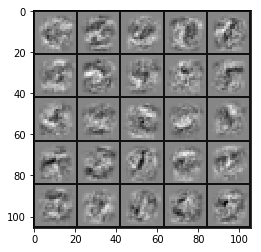

In [12]:
## ========================= Part 10: Visualizing Weights ===========================
print('Visualizing Neural Network...\n')
displayData(Theta1[:, 1:])